# Generate D-efficient designs

This notebook contains example code from the article [Two-level designs to estimate all main effects and two-factor interactions](https://doi.org/10.1080/00401706.2016.1142903). by Eendebak, P. T. and Schoen, E. D.
This example shows how to generate D-efficient designs with a user-specified optimization function.

In [1]:
import numpy as np
import oapackage
import oapackage.Doptim

Define the class of designs to generate.

In [4]:
run_size = 40
number_of_factors=7 
factor_levels=2 
strength=0 
arrayclass=oapackage.arraydata_t(factor_levels, run_size, strength, number_of_factors)
print('We generate D-efficient designs with %d rows and %d columns\n' % (run_size, number_of_factors) )

We generate D-efficient designs with 40 rows and 7 columns



Generate a single D-efficient design using $\alpha=(1,2,0)$ as the parameters for the optimization function. For details on this parameter and its corresponding optimization function, see [Two-Level Designs to Estimate All Main Effects and Two-Factor Interactions](https://doi.org/10.1080/00401706.2016.1142903).

In [5]:
alpha=[1,2,0]
scores, design_efficiencies, designs, ngenerated = oapackage.Doptimize(arrayclass, nrestarts=30, optimfunc=alpha, selectpareto=True)

Doptim: optimization class 40.2-2-2-2-2-2-2
Doptimize: iteration 0/30
Doptimize: iteration 29/30
Doptim: done (12 arrays, 1.5 [s])


In [6]:
print('\nGenerated %d designs, the efficiencies for these designs are:' % len(designs))
for ii, d in enumerate(designs):
    dd = d.Defficiencies()
    print('array %d: D-efficiency %.4f, Ds-efficiency %.4f' % (ii, dd[0], dd[1]) )

D=[d.Defficiency() for d in designs]
best=np.argmax(D)
print('\nThe design with the highest D-efficiency (%.4f) is:\n' % D[best] )

designs[best].transposed().showarraycompact()


Generated 12 designs, the efficiencies for these designs are:
array 0: D-efficiency 0.8775, Ds-efficiency 0.9783
array 1: D-efficiency 0.9040, Ds-efficiency 0.9627
array 2: D-efficiency 0.8632, Ds-efficiency 0.9827
array 3: D-efficiency 0.9047, Ds-efficiency 0.9596
array 4: D-efficiency 0.8498, Ds-efficiency 0.9854
array 5: D-efficiency 0.8908, Ds-efficiency 0.9627
array 6: D-efficiency 0.8829, Ds-efficiency 0.9631
array 7: D-efficiency 0.8857, Ds-efficiency 0.9600
array 8: D-efficiency 0.8859, Ds-efficiency 0.9552
array 9: D-efficiency 0.8972, Ds-efficiency 0.9323
array 10: D-efficiency 0.8905, Ds-efficiency 0.9345
array 11: D-efficiency 0.8745, Ds-efficiency 0.9394

The design with the highest D-efficiency (0.9047) is:

1100011000010010111010110111000001110101
1111000101100100100100011101001000111001
1011011110110001100100100000010011100011
1101110110000000101100110100011101001100
0101011011101000110100011010100100111110
0100010101011111001101100110000100110011
001100100100000010011

Optimizing with a different optimization target leads to different D-efficient designs. Below we compare the sets of designs generated with
optimization target [1,0,0] and [1,2,0].

In [7]:
scores0, design_efficiencies0, designs0, _ = oapackage.Doptimize(arrayclass, nrestarts=30, optimfunc=[1,0,0], selectpareto=True)

Doptim: optimization class 40.2-2-2-2-2-2-2
Doptimize: iteration 0/30
Doptimize: iteration 29/30
Doptim: done (8 arrays, 1.4 [s])


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Pareto: 20 optimal values, 20 objects


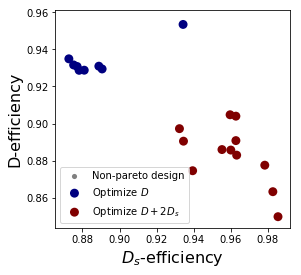

<Figure size 432x288 with 0 Axes>

In [9]:
def combineEfficiencyData(lst):
    data = np.zeros((0, 4))

    for jj, dds in enumerate(lst):
            dds_index=np.hstack((dds, jj * np.ones( (len(dds),1)) ) )
            data=np.vstack( (data, dds_index) )
    return data
                        
design_efficiencies_combined=combineEfficiencyData([design_efficiencies0, design_efficiencies])
plot_handles=oapackage.generateDscatter(design_efficiencies_combined, ndata=3, lbls=['Optimize $D$','Optimize $D+2D_s$'], verbose=0)